## Filter feature selection

### SelectPercentile

## Feature Selection by Percentile BY 55%>>>>>> 88%

## ‘Age', 'FBS', 'ALB', 'CA15', 'CEA', 'WBC', 'RBC', 'HGB', 'PLT', 'ESR', 'LDH

## (2437, 11)


In [1]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns

from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif 
#----------------------------------------------------


In [2]:
#load breast cancer data

BC = pd.read_csv('bc_with_mis_90.csv')




In [3]:
BC["FBS"].fillna(BC["FBS"].mean(), inplace=True)
BC["Urea"].fillna(BC["Urea"].mean(), inplace=True)
BC["Creatinin"].fillna(BC["Creatinin"].mean(), inplace=True)
BC["ALB"].fillna(BC["ALB"].mean(), inplace=True)
BC["TCa"].fillna(BC["TCa"].mean(), inplace=True)
BC["GPT"].fillna(BC["GPT"].mean(), inplace=True)
BC["GOT"].fillna(BC["GOT"].mean(), inplace=True)
BC["ALP"].fillna(BC["ALP"].mean(), inplace=True)
BC["WBC"].fillna(BC["WBC"].mean(), inplace=True)
BC["HGB"].fillna(BC["HGB"].mean(), inplace=True)
BC["RBC"].fillna(BC["RBC"].mean(), inplace=True)
BC["PLT"].fillna(BC["PLT"].mean(), inplace=True)
BC["ESR"].fillna(BC["ESR"].mean(), inplace=True)
BC["LDH"].fillna(BC["LDH"].mean(), inplace=True)
BC["Na"].fillna(BC["Na"].mean(), inplace=True)
BC["K"].fillna(BC["K"].mean(), inplace=True)
BC["CL"].fillna(BC["CL"].mean(), inplace=True)
BC["CA15"].fillna(BC["CA15"].mean(), inplace=True)
BC["CEA"].fillna(BC["CEA"].mean(), inplace=True)
BC

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,200.0,23.0,0.8,3.400000,1.0,2.0,1.0,124.000000,69.120000,8.020000,3.4,4.60,13.4,500.000000,25.0,150.0,145.0,4.50,19.1,0
1,1,53,Sabha,400.0,22.0,0.7,4.461508,9.6,3.0,7.0,133.000000,51.820000,7.910000,4.4,5.00,12.5,283.554362,15.0,260.0,137.8,4.18,19.1,0
2,1,50,Sabha,450.0,27.0,0.6,3.500000,9.3,11.0,17.0,155.000000,50.000000,8.740000,5.1,4.46,12.5,456.000000,2.0,169.0,139.2,4.17,16.4,0
3,1,36,Obaree-center,300.0,15.0,1.1,4.200000,8.5,13.0,1.0,140.701195,40.110000,10.340000,3.1,4.33,13.8,600.000000,15.0,138.0,14.0,4.00,1.1,0
4,1,30,Obaree-center,345.0,2.0,1.0,3.000000,8.0,7.0,13.0,125.000000,67.630000,7.310000,4.2,4.13,1.7,543.000000,25.0,154.0,136.4,4.60,17.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,1,30,Algatroon,70.0,28.0,0.7,5.900000,9.5,63.0,23.0,234.000000,21.000000,1.120000,3.9,5.23,11.3,288.000000,15.0,254.0,138.7,4.35,103.6,1
2433,1,47,Sabha,98.0,32.0,0.8,10.200000,8.8,82.0,23.0,190.000000,21.370000,2.020000,4.8,4.57,13.2,249.000000,12.0,254.0,142.3,4.40,102.7,1
2434,1,43,Sabha,76.0,15.0,0.6,11.400000,8.1,22.0,15.0,143.000000,8.500000,0.500000,4.4,4.32,11.1,249.000000,8.0,254.0,137.8,4.25,110.2,1
2435,1,60,Sabha,120.0,29.0,0.9,10.900000,8.2,51.0,17.0,104.000000,30.967314,4.536407,4.5,4.41,12.9,293.000000,13.0,254.0,147.5,3.15,107.5,1


## outlires by Z-score

In [4]:
BC["ZScore_FBS"] = (BC.FBS - BC.FBS.mean())/(BC.FBS.std())
BC["ZScore_Urea"] = (BC.Urea - BC.Urea.mean())/(BC.Urea.std())
BC["ZScore_creatinine"] = (BC.Creatinin - BC.Creatinin.mean())/(BC.Creatinin.std())
BC["ZScore_ALB"] = (BC.ALB - BC.ALB.mean())/(BC.ALB.std())
BC["ZScore_TCa"] = (BC.TCa - BC.TCa.mean())/(BC.TCa.std())

BC["ZScore_GPT"] = (BC.GPT - BC.GPT.mean())/(BC.GPT.std())
BC["ZScore_GOT"] = (BC.GOT - BC.GOT.mean())/(BC.GOT.std())
BC["ZScore_ALP"] = (BC.ALP - BC.ALP.mean())/(BC.ALP.std())
BC["ZScore_CA15"] = (BC.CA15 - BC.CA15.mean())/(BC.CA15.std())
BC["ZScore_CEA"] = (BC.CEA - BC.CEA.mean())/(BC.CEA.std())
BC["ZScore_WBC"] = (BC.WBC - BC.WBC.mean())/(BC.WBC.std())
BC["ZScore_RBC"] = (BC.RBC - BC.RBC.mean())/(BC.RBC.std())
BC["ZScore_HGB"] = (BC.HGB - BC.HGB.mean())/(BC.HGB.std())
BC["ZScore_PLT"] = (BC.PLT - BC.PLT.mean())/(BC.PLT.std())
BC["ZScore_ESR"] = (BC.ESR - BC.ESR.mean())/(BC.ESR.std())
BC["ZScore_LDH"] = (BC.LDH - BC.LDH.mean())/(BC.LDH.std())
BC["ZScore_Na"] = (BC.Na - BC.Na.mean())/(BC.Na.std())
BC["ZScore_CL"] = (BC.CL - BC.CL.mean())/(BC.CL.std())
BC["ZScore_K"] = (BC.K - BC.K.mean())/(BC.K.std())



In [5]:
BC_FBS_outlier_Z = BC[(BC.ZScore_FBS>3) | (BC.ZScore_FBS<-3)]
BC_Urea_outlier_Z = BC[(BC.ZScore_Urea>3) | (BC.ZScore_Urea<-3)]
BC_creatinine_outlier_Z = BC[(BC.ZScore_creatinine>3) | (BC.ZScore_creatinine<-3)]
BC_ALB_outlier_Z = BC[(BC.ZScore_ALB>3) | (BC.ZScore_ALB<-3)]
BC_TCa_outlier_Z = BC[(BC.ZScore_TCa>3) | (BC.ZScore_TCa<-3)]

BC_GPT_outlier_Z = BC[(BC.ZScore_GPT>3) | (BC.ZScore_GPT<-3)]
BC_GOT_outlier_Z = BC[(BC.ZScore_GOT>3) | (BC.ZScore_GOT<-3)]
BC_ALP_outlier_Z = BC[(BC.ZScore_ALP>3) | (BC.ZScore_ALP<-3)]
BC_CA15_outlier_Z = BC[(BC.ZScore_CA15>3) | (BC.ZScore_CA15<-3)]
BC_CEA_outlier_Z = BC[(BC.ZScore_CEA>3) | (BC.ZScore_CEA<-3)]
BC_WBC_outlier_Z = BC[(BC.ZScore_WBC>3) | (BC.ZScore_WBC<-3)]
BC_RBC_outlier_Z = BC[(BC.ZScore_RBC>3) | (BC.ZScore_RBC<-3)]
BC_HGB_outlier_Z = BC[(BC.ZScore_HGB>3) | (BC.ZScore_HGB<-3)]
BC_PLT_outlier_Z = BC[(BC.ZScore_PLT>3) | (BC.ZScore_PLT<-3)]
BC_ESR_outlier_Z = BC[(BC.ZScore_ESR>3) | (BC.ZScore_ESR<-3)]
BC_LDH_outlier_Z = BC[(BC.ZScore_LDH>3) | (BC.ZScore_LDH<-3)]
BC_Na_outlier_Z = BC[(BC.ZScore_Na>3) | (BC.ZScore_Na<-3)]
BC_K_outlier_Z = BC[(BC.ZScore_CL>3) | (BC.ZScore_CL<-3)]
BC_CL_outlier_Z = BC[(BC.ZScore_K>3) | (BC.ZScore_K<-3)]


In [6]:
BC.isnull().sum()

Sex                  0
Age                  0
Adress               0
FBS                  0
Urea                 0
Creatinin            0
ALB                  0
TCa                  0
GPT                  0
GOT                  0
ALP                  0
CA15                 0
CEA                  0
WBC                  0
RBC                  0
HGB                  0
PLT                  0
ESR                  0
LDH                  0
Na                   0
K                    0
CL                   0
CLASS                0
ZScore_FBS           0
ZScore_Urea          0
ZScore_creatinine    0
ZScore_ALB           0
ZScore_TCa           0
ZScore_GPT           0
ZScore_GOT           0
ZScore_ALP           0
ZScore_CA15          0
ZScore_CEA           0
ZScore_WBC           0
ZScore_RBC           0
ZScore_HGB           0
ZScore_PLT           0
ZScore_ESR           0
ZScore_LDH           0
ZScore_Na            0
ZScore_CL            0
ZScore_K             0
dtype: int64

In [7]:
#assigning nan to the outliers

BC['FBS'].values[BC['ZScore_FBS'] > 3] = np.nan
BC['FBS'].values[BC['ZScore_FBS'] < -3] = np.nan

BC['Urea'].values[BC['ZScore_Urea'] > 3] = np.nan
BC['Urea'].values[BC['ZScore_Urea'] < -3] = np.nan

BC['Creatinin'].values[BC['ZScore_creatinine'] > 3] = np.nan
BC['Creatinin'].values[BC['ZScore_creatinine'] < -3] = np.nan

BC['ALB'].values[BC['ZScore_ALB'] > 3] = np.nan
BC['ALB'].values[BC['ZScore_ALB'] < -3] = np.nan

BC['TCa'].values[BC['ZScore_TCa'] > 3] = np.nan
BC['TCa'].values[BC['ZScore_TCa'] < -3] = np.nan


BC['GPT'].values[BC['ZScore_GPT'] > 3] = np.nan
BC['GPT'].values[BC['ZScore_GPT'] < -3] = np.nan

BC['GOT'].values[BC['ZScore_GOT'] > 3] = np.nan
BC['GOT'].values[BC['ZScore_GOT'] < -3] = np.nan

BC['ALP'].values[BC['ZScore_ALP'] > 3] = np.nan
BC['ALP'].values[BC['ZScore_ALP'] < -3] = np.nan

BC['CA15'].values[BC['ZScore_CA15'] > 3] = np.nan
BC['CA15'].values[BC['ZScore_CA15'] < -3] = np.nan

BC['CEA'].values[BC['ZScore_CEA'] > 3] = np.nan
BC['CEA'].values[BC['ZScore_CEA'] < -3] = np.nan

BC['WBC'].values[BC['ZScore_WBC'] > 3] = np.nan
BC['WBC'].values[BC['ZScore_WBC'] < -3] = np.nan

BC['RBC'].values[BC['ZScore_RBC'] > 3] = np.nan
BC['RBC'].values[BC['ZScore_RBC'] < -3] = np.nan

BC['HGB'].values[BC['ZScore_HGB'] > 3] = np.nan
BC['HGB'].values[BC['ZScore_HGB'] < -3] = np.nan

BC['PLT'].values[BC['ZScore_PLT'] > 3] = np.nan
BC['PLT'].values[BC['ZScore_PLT'] < -3] = np.nan

BC['ESR'].values[BC['ZScore_ESR'] > 3] = np.nan
BC['ESR'].values[BC['ZScore_ESR'] < -3] = np.nan

BC['LDH'].values[BC['ZScore_LDH'] > 3] = np.nan
BC['LDH'].values[BC['ZScore_LDH'] < -3] = np.nan

BC['Na'].values[BC['ZScore_Na'] > 3] = np.nan
BC['Na'].values[BC['ZScore_Na'] < -3] = np.nan

BC['CL'].values[BC['ZScore_CL'] > 3] = np.nan
BC['CL'].values[BC['ZScore_CL'] < -3] = np.nan

BC['K'].values[BC['ZScore_K'] > 3] = np.nan
BC['K'].values[BC['ZScore_K'] < -3] = np.nan

In [8]:
BC.drop(["ZScore_FBS","ZScore_Urea","ZScore_creatinine","ZScore_ALB","ZScore_TCa","ZScore_GPT","ZScore_GOT","ZScore_ALP",
        "ZScore_CA15","ZScore_CEA","ZScore_WBC","ZScore_RBC","ZScore_HGB","ZScore_PLT","ZScore_ESR","ZScore_LDH",
        "ZScore_Na","ZScore_CL","ZScore_K"],axis=1,inplace=True)

BC.isnull().sum()

Sex           0
Age           0
Adress        0
FBS          50
Urea         66
Creatinin    27
ALB          60
TCa           8
GPT          61
GOT          43
ALP          28
CA15          3
CEA           1
WBC          13
RBC           4
HGB           3
PLT           3
ESR          30
LDH          12
Na            1
K             8
CL            3
CLASS         0
dtype: int64

In [9]:
#imputing nan values

BC["FBS"].fillna(BC["FBS"].mean(), inplace=True)
BC["Urea"].fillna(BC["Urea"].mean(), inplace=True)
BC["Creatinin"].fillna(BC["Creatinin"].mean(), inplace=True)
BC["ALB"].fillna(BC["ALB"].mean(), inplace=True)
BC["TCa"].fillna(BC["TCa"].mean(), inplace=True)
BC["GPT"].fillna(BC["GPT"].mean(), inplace=True)
BC["GOT"].fillna(BC["GOT"].mean(), inplace=True)
BC["ALP"].fillna(BC["ALP"].mean(), inplace=True)
BC["WBC"].fillna(BC["WBC"].mean(), inplace=True)
BC["HGB"].fillna(BC["HGB"].mean(), inplace=True)
BC["RBC"].fillna(BC["RBC"].mean(), inplace=True)
BC["PLT"].fillna(BC["PLT"].mean(), inplace=True)
BC["ESR"].fillna(BC["ESR"].mean(), inplace=True)
BC["LDH"].fillna(BC["LDH"].mean(), inplace=True)
BC["Na"].fillna(BC["Na"].mean(), inplace=True)
BC["K"].fillna(BC["K"].mean(), inplace=True)
BC["CL"].fillna(BC["CL"].mean(), inplace=True)
BC["CA15"].fillna(BC["CA15"].mean(), inplace=True)
BC["CEA"].fillna(BC["CEA"].mean(), inplace=True)
BC

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,200.00000,23.0,0.8,3.400000,1.0,2.000000,1.0,124.000000,69.120000,8.020000,3.4,4.60,13.4,500.000000,25.0,150.0,145.0,4.50,19.1,0
1,1,53,Sabha,154.36173,22.0,0.7,4.461508,9.6,3.000000,7.0,133.000000,51.820000,7.910000,4.4,5.00,12.5,283.554362,15.0,260.0,137.8,4.18,19.1,0
2,1,50,Sabha,154.36173,27.0,0.6,3.500000,9.3,11.000000,17.0,155.000000,50.000000,8.740000,5.1,4.46,12.5,456.000000,2.0,169.0,139.2,4.17,16.4,0
3,1,36,Obaree-center,300.00000,15.0,1.1,4.200000,8.5,13.000000,1.0,140.701195,40.110000,10.340000,3.1,4.33,13.8,600.000000,15.0,138.0,14.0,4.00,1.1,0
4,1,30,Obaree-center,345.00000,2.0,1.0,3.000000,8.0,7.000000,13.0,125.000000,67.630000,7.310000,4.2,4.13,1.7,543.000000,25.0,154.0,136.4,4.60,17.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,1,30,Algatroon,70.00000,28.0,0.7,5.900000,9.5,13.882247,23.0,234.000000,21.000000,1.120000,3.9,5.23,11.3,288.000000,15.0,254.0,138.7,4.35,103.6,1
2433,1,47,Sabha,98.00000,32.0,0.8,10.200000,8.8,13.882247,23.0,190.000000,21.370000,2.020000,4.8,4.57,13.2,249.000000,12.0,254.0,142.3,4.40,102.7,1
2434,1,43,Sabha,76.00000,15.0,0.6,11.400000,8.1,22.000000,15.0,143.000000,8.500000,0.500000,4.4,4.32,11.1,249.000000,8.0,254.0,137.8,4.25,110.2,1
2435,1,60,Sabha,120.00000,29.0,0.9,10.900000,8.2,51.000000,17.0,104.000000,30.967314,4.536407,4.5,4.41,12.9,293.000000,13.0,254.0,147.5,3.15,107.5,1


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = BC.columns.tolist()
for column in cols:
    if BC[column].dtype == 'object':
        BC[column] = le.fit_transform(BC[column])


In [11]:
# y includes our labels and x includes our features
y = BC.CLASS                          # M or B 
list = ['CLASS']
x = BC.drop(list,axis = 1 )
x.head()

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL
0,1,60,24,200.00000,23.0,0.8,3.400000,1.0,2.0,1.0,124.000000,69.12,8.02,3.4,4.60,13.4,500.000000,25.0,150.0,145.0,4.50,19.1
1,1,53,19,154.36173,22.0,0.7,4.461508,9.6,3.0,7.0,133.000000,51.82,7.91,4.4,5.00,12.5,283.554362,15.0,260.0,137.8,4.18,19.1
2,1,50,19,154.36173,27.0,0.6,3.500000,9.3,11.0,17.0,155.000000,50.00,8.74,5.1,4.46,12.5,456.000000,2.0,169.0,139.2,4.17,16.4
3,1,36,17,300.00000,15.0,1.1,4.200000,8.5,13.0,1.0,140.701195,40.11,10.34,3.1,4.33,13.8,600.000000,15.0,138.0,14.0,4.00,1.1
4,1,30,17,345.00000,2.0,1.0,3.000000,8.0,7.0,13.0,125.000000,67.63,7.31,4.2,4.13,1.7,543.000000,25.0,154.0,136.4,4.60,17.1


## Feature Selection by Percentile

In [12]:

#print('Original X Shape is ' , X.shape)
FeatureSelection = SelectPercentile(score_func = f_classif, percentile=10) # score_func can = f_classif
X = FeatureSelection.fit_transform(x, y)


In [13]:
#showing X Dimension 
#print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())


x.columns[FeatureSelection.get_support()]


Selected Features are :  [False False False False False False False False False False False  True
  True False  True False False False False False False False]


Index(['CA15', 'CEA', 'RBC'], dtype='object')

In [14]:
## تدريب النموذج علي أفضل 5 سمة بعد معالجة القيم المفقودة


X=BC.drop(["CLASS","Sex","Age","FBS","Adress","Urea","Creatinin","ALB","TCa","GPT","GOT","ALP","WBC","PLT","ESR","LDH","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 


X.shape


(2437, 3)

In [15]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)


In [16]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 




DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [17]:
y_pred=D_classifier.predict_proba(x_test)[:,1]



In [18]:
new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)



In [19]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)




0.7147540983606557

In [20]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.28524590163934427
mean_squared_error is = 0.5340841709312721


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 0.9989053092501369
Decision Tree classifier Testing Accurcy =  0.7147540983606557
[[265  83]
 [ 91 171]]


Text(33.0, 0.5, 'Acutl')

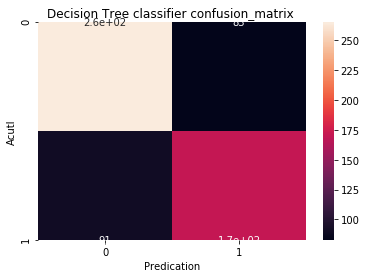

In [21]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [22]:

### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       348
           1       0.67      0.65      0.66       262

    accuracy                           0.71       610
   macro avg       0.71      0.71      0.71       610
weighted avg       0.71      0.71      0.71       610

accuracy_score= 0.7147540983606557


## Feature Selection by Percentile BY 15%

In [23]:
#print('Original X Shape is ' , X.shape)
FeatureSelection = SelectPercentile(score_func = f_classif, percentile=15) # score_func can = f_classif
X = FeatureSelection.fit_transform(x, y)


In [24]:
#showing X Dimension 
#print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())


x.columns[FeatureSelection.get_support()]


Selected Features are :  [False False False False False False False False False False False  True
  True  True  True False False False False False False False]


Index(['CA15', 'CEA', 'WBC', 'RBC'], dtype='object')

In [25]:
X=BC.drop(["CLASS","Sex","Age","FBS","Adress","Urea","Creatinin","ALB","TCa","GPT","GOT","ALP","PLT","ESR","LDH","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 


X.shape


(2437, 4)

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)


from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [27]:
y_pred=D_classifier.predict_proba(x_test)[:,1]



new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [28]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.7491803278688525

In [29]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.25081967213114753
mean_squared_error is = 0.5008190013679069


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.7491803278688525
[[262  81]
 [ 72 195]]


Text(33.0, 0.5, 'Acutl')

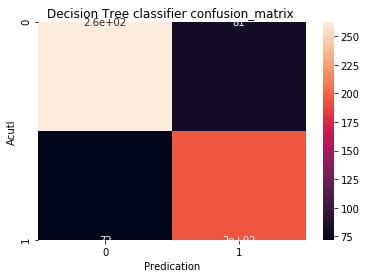

In [30]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [31]:
### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       343
           1       0.71      0.73      0.72       267

    accuracy                           0.75       610
   macro avg       0.75      0.75      0.75       610
weighted avg       0.75      0.75      0.75       610

accuracy_score= 0.7491803278688525


## Feature Selection by Percentile BY 20%

In [32]:
#print('Original X Shape is ' , X.shape)
FeatureSelection = SelectPercentile(score_func = f_classif, percentile=20) # score_func can = f_classif
X = FeatureSelection.fit_transform(x, y)


In [33]:
#showing X Dimension 
#print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())


x.columns[FeatureSelection.get_support()]


Selected Features are :  [False False False False False False False False False False False  True
  True  True  True False False  True False False False False]


Index(['CA15', 'CEA', 'WBC', 'RBC', 'ESR'], dtype='object')

In [34]:
X=BC.drop(["CLASS","Sex","Age","FBS","Adress","Urea","Creatinin","ALB","TCa","GPT","GOT","ALP","PLT","LDH","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 


X.shape


(2437, 5)

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)


In [36]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [37]:
y_pred=D_classifier.predict_proba(x_test)[:,1]



new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [38]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.7442622950819672

In [39]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.25573770491803277
mean_squared_error is = 0.505705156111773


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.7442622950819672
[[255  80]
 [ 76 199]]


Text(33.0, 0.5, 'Acutl')

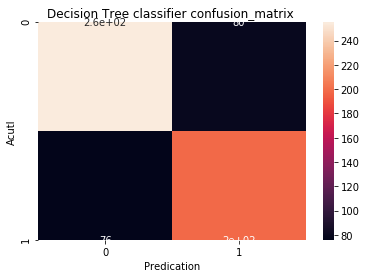

In [40]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [41]:
### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.77      0.76      0.77       335
           1       0.71      0.72      0.72       275

    accuracy                           0.74       610
   macro avg       0.74      0.74      0.74       610
weighted avg       0.74      0.74      0.74       610

accuracy_score= 0.7442622950819672


## Feature Selection by Percentile BY 25%

In [42]:
#print('Original X Shape is ' , X.shape)
FeatureSelection = SelectPercentile(score_func = f_classif, percentile=25) # score_func can = f_classif
X = FeatureSelection.fit_transform(x, y)


In [43]:
#showing X Dimension 
#print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())

x.columns[FeatureSelection.get_support()]


Selected Features are :  [False False False False False False False False False False False  True
  True  True  True False  True  True False False False False]


Index(['CA15', 'CEA', 'WBC', 'RBC', 'PLT', 'ESR'], dtype='object')

In [44]:
X=BC.drop(["CLASS","Sex","Age","FBS","Adress","Urea","Creatinin","ALB","TCa","GPT","GOT","ALP","LDH","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 


X.shape


(2437, 6)

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)


In [46]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [47]:
y_pred=D_classifier.predict_proba(x_test)[:,1]



new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [48]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.7852459016393443

In [49]:


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.21475409836065573
mean_squared_error is = 0.46341568635584157


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.7852459016393443
[[257  73]
 [ 58 222]]


Text(33.0, 0.5, 'Acutl')

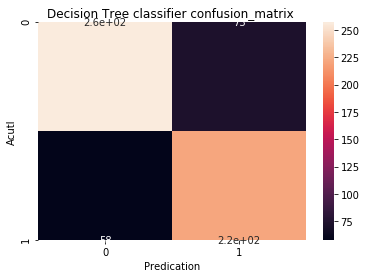

In [50]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [51]:
### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       330
           1       0.75      0.79      0.77       280

    accuracy                           0.79       610
   macro avg       0.78      0.79      0.78       610
weighted avg       0.79      0.79      0.79       610

accuracy_score= 0.7852459016393443


## Feature Selection by Percentile BY 30%

In [52]:
#print('Original X Shape is ' , X.shape)
FeatureSelection = SelectPercentile(score_func = f_classif, percentile=30) # score_func can = f_classif
X = FeatureSelection.fit_transform(x, y)


In [53]:
#showing X Dimension 
#print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())

x.columns[FeatureSelection.get_support()]


Selected Features are :  [False False False  True False False False False False False False  True
  True  True  True False  True  True False False False False]


Index(['FBS', 'CA15', 'CEA', 'WBC', 'RBC', 'PLT', 'ESR'], dtype='object')

In [54]:
X=BC.drop(["CLASS","Sex","Age","Adress","Urea","Creatinin","ALB","TCa","GPT","GOT","ALP","LDH","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 


X.shape


(2437, 7)

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)


In [56]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [57]:
y_pred=D_classifier.predict_proba(x_test)[:,1]



new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [58]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.8245901639344262

In [59]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)




mean_absolute_error is = 0.17540983606557378
mean_squared_error is = 0.4188195745969543


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8245901639344262
[[269  52]
 [ 55 234]]


Text(33.0, 0.5, 'Acutl')

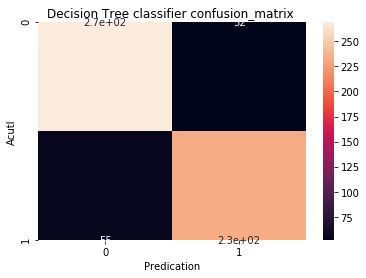

In [60]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")



In [61]:


### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 




classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       321
           1       0.82      0.81      0.81       289

    accuracy                           0.82       610
   macro avg       0.82      0.82      0.82       610
weighted avg       0.82      0.82      0.82       610

accuracy_score= 0.8245901639344262


## Feature Selection by Percentile BY 35%

In [62]:
#print('Original X Shape is ' , X.shape)
FeatureSelection = SelectPercentile(score_func = f_classif, percentile=35) # score_func can = f_classif
X = FeatureSelection.fit_transform(x, y)



In [63]:
#showing X Dimension 
#print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())

x.columns[FeatureSelection.get_support()]



Selected Features are :  [False False False  True False False  True False False False False  True
  True  True  True False  True  True False False False False]


Index(['FBS', 'ALB', 'CA15', 'CEA', 'WBC', 'RBC', 'PLT', 'ESR'], dtype='object')

In [65]:
X=BC.drop(["CLASS","Sex","Age","Adress","Urea","Creatinin","TCa","GPT","GOT","ALP","LDH","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 
X.shape


(2437, 8)

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)



In [67]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [68]:
y_pred=D_classifier.predict_proba(x_test)[:,1]



new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [69]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.840983606557377

In [70]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.15901639344262294
mean_squared_error is = 0.39876859635962175


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.840983606557377
[[268  38]
 [ 59 245]]


Text(33.0, 0.5, 'Acutl')

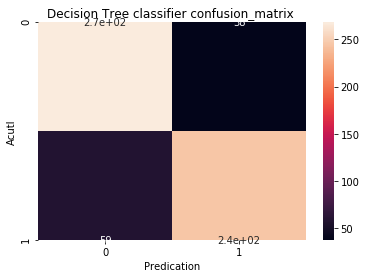

In [71]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")



In [72]:
### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       306
           1       0.87      0.81      0.83       304

    accuracy                           0.84       610
   macro avg       0.84      0.84      0.84       610
weighted avg       0.84      0.84      0.84       610

accuracy_score= 0.840983606557377


## Feature Selection by Percentile BY 40%

In [73]:
#print('Original X Shape is ' , X.shape)
FeatureSelection = SelectPercentile(score_func = f_classif, percentile=40) # score_func can = f_classif
X = FeatureSelection.fit_transform(x, y)



In [74]:
#showing X Dimension 
#print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())

x.columns[FeatureSelection.get_support()]


Selected Features are :  [False False False  True False False  True False False False False  True
  True  True  True False  True  True  True False False False]


Index(['FBS', 'ALB', 'CA15', 'CEA', 'WBC', 'RBC', 'PLT', 'ESR', 'LDH'], dtype='object')

In [75]:
X=BC.drop(["CLASS","Sex","Age","Adress","Urea","Creatinin","TCa","GPT","GOT","ALP","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 
X.shape


(2437, 9)

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)


In [77]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [78]:
y_pred=D_classifier.predict_proba(x_test)[:,1]



new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [79]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.8655737704918033

In [80]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.13442622950819672
mean_squared_error is = 0.3666418272758807


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8655737704918033
[[287  41]
 [ 41 241]]


Text(33.0, 0.5, 'Acutl')

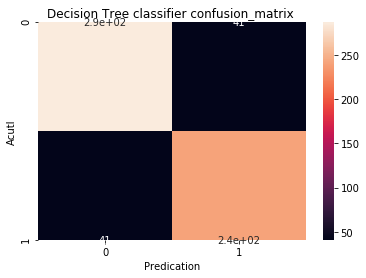

In [81]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [82]:

### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 





classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       328
           1       0.85      0.85      0.85       282

    accuracy                           0.87       610
   macro avg       0.86      0.86      0.86       610
weighted avg       0.87      0.87      0.87       610

accuracy_score= 0.8655737704918033


## Feature Selection by Percentile BY 45%

In [83]:
#print('Original X Shape is ' , X.shape)
FeatureSelection = SelectPercentile(score_func = f_classif, percentile=45) # score_func can = f_classif
X = FeatureSelection.fit_transform(x, y)




In [84]:
#showing X Dimension 
#print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())

x.columns[FeatureSelection.get_support()]


Selected Features are :  [False False False  True False  True  True False False False False  True
  True  True  True False  True  True  True False False False]


Index(['FBS', 'Creatinin', 'ALB', 'CA15', 'CEA', 'WBC', 'RBC', 'PLT', 'ESR',
       'LDH'],
      dtype='object')

In [85]:
X=BC.drop(["CLASS","Sex","Age","Adress","Urea","TCa","GPT","GOT","ALP","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 
X.shape


(2437, 10)

In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)



In [87]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [88]:
y_pred=D_classifier.predict_proba(x_test)[:,1]



new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [89]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.8622950819672132

In [90]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.1377049180327869
mean_squared_error is = 0.3710861329028436


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8622950819672132
[[301  37]
 [ 47 225]]


Text(33.0, 0.5, 'Acutl')

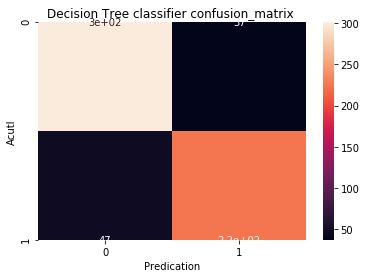

In [91]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [92]:
### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 





classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       338
           1       0.86      0.83      0.84       272

    accuracy                           0.86       610
   macro avg       0.86      0.86      0.86       610
weighted avg       0.86      0.86      0.86       610

accuracy_score= 0.8622950819672132


## Feature Selection by Percentile BY 50%

In [93]:
#print('Original X Shape is ' , X.shape)
FeatureSelection = SelectPercentile(score_func = f_classif, percentile=50) # score_func can = f_classif
X = FeatureSelection.fit_transform(x, y)



In [94]:
#showing X Dimension 
#print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())

x.columns[FeatureSelection.get_support()]


Selected Features are :  [False False False  True False  True  True False False False False  True
  True  True  True  True  True  True  True False False False]


Index(['FBS', 'Creatinin', 'ALB', 'CA15', 'CEA', 'WBC', 'RBC', 'HGB', 'PLT',
       'ESR', 'LDH'],
      dtype='object')

In [96]:

X=BC.drop(["CLASS","Sex","Age","Adress","Urea","TCa","GPT","GOT","ALP","K","Na","CL"],axis=1)
Y=BC["CLASS"] 
X.shape



(2437, 11)

In [97]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)



In [98]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [99]:
y_pred=D_classifier.predict_proba(x_test)[:,1]



new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)



In [100]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.8442622950819673

In [101]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.1557377049180328
mean_squared_error is = 0.39463616777740074


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8442622950819673
[[295  56]
 [ 39 220]]


Text(33.0, 0.5, 'Acutl')

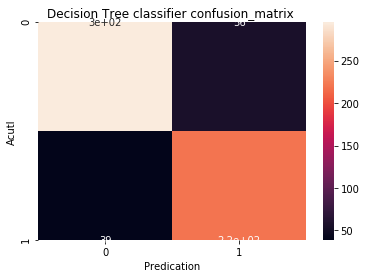

In [102]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [103]:
### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       351
           1       0.80      0.85      0.82       259

    accuracy                           0.84       610
   macro avg       0.84      0.84      0.84       610
weighted avg       0.85      0.84      0.84       610

accuracy_score= 0.8442622950819673


## Feature Selection by Percentile BY 55%

In [104]:
#print('Original X Shape is ' , X.shape)
FeatureSelection = SelectPercentile(score_func = f_classif, percentile=55) # score_func can = f_classif
X = FeatureSelection.fit_transform(x, y)



In [105]:
#showing X Dimension 
#print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())

x.columns[FeatureSelection.get_support()]



Selected Features are :  [False  True False  True False  True  True False False False False  True
  True  True  True  True  True  True  True False False False]


Index(['Age', 'FBS', 'Creatinin', 'ALB', 'CA15', 'CEA', 'WBC', 'RBC', 'HGB',
       'PLT', 'ESR', 'LDH'],
      dtype='object')

In [108]:
X=BC.drop(["CLASS","Sex","Adress","Urea","TCa","GPT","GOT","ALP","K","Na","CL"],axis=1)
Y=BC["CLASS"] 
X.shape



(2437, 12)

In [109]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)


In [110]:



from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [111]:
y_pred=D_classifier.predict_proba(x_test)[:,1]



new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)



In [112]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.8803278688524591

In [113]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.11967213114754098
mean_squared_error is = 0.3459365998959072


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8803278688524591
[[296  33]
 [ 40 241]]


Text(33.0, 0.5, 'Acutl')

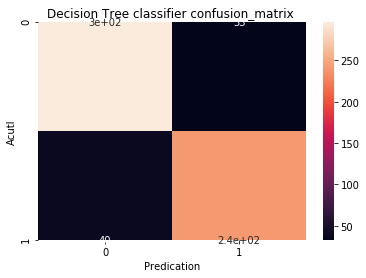

In [114]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [115]:
### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       329
           1       0.88      0.86      0.87       281

    accuracy                           0.88       610
   macro avg       0.88      0.88      0.88       610
weighted avg       0.88      0.88      0.88       610

accuracy_score= 0.8803278688524591


## Feature Selection by Percentile BY 60%


In [116]:
#print('Original X Shape is ' , X.shape)
FeatureSelection = SelectPercentile(score_func = f_classif, percentile=60) # score_func can = f_classif
X = FeatureSelection.fit_transform(x, y)


In [117]:
#showing X Dimension 
#print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())

x.columns[FeatureSelection.get_support()]


Selected Features are :  [False  True  True  True False  True  True False False False False  True
  True  True  True  True  True  True  True False False False]


Index(['Age', 'Adress', 'FBS', 'Creatinin', 'ALB', 'CA15', 'CEA', 'WBC', 'RBC',
       'HGB', 'PLT', 'ESR', 'LDH'],
      dtype='object')

In [120]:
X=BC.drop(["CLASS","Sex","Urea","TCa","GPT","GOT","ALP","K","Na","CL"],axis=1)
Y=BC["CLASS"] 
X.shape



(2437, 13)

In [121]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)


In [122]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [123]:
y_pred=D_classifier.predict_proba(x_test)[:,1]



new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)



In [124]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8426229508196721

In [125]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.15737704918032788
mean_squared_error is = 0.39670776294437177


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8426229508196721
[[293  59]
 [ 37 221]]


Text(33.0, 0.5, 'Acutl')

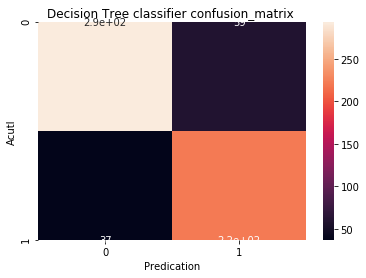

In [126]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [127]:
### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       352
           1       0.79      0.86      0.82       258

    accuracy                           0.84       610
   macro avg       0.84      0.84      0.84       610
weighted avg       0.85      0.84      0.84       610

accuracy_score= 0.8426229508196721



## Feature Selection by Percentile BY 65%


In [128]:
#print('Original X Shape is ' , X.shape)
FeatureSelection = SelectPercentile(score_func = f_classif, percentile=65) # score_func can = f_classif
X = FeatureSelection.fit_transform(x, y)


In [129]:
#showing X Dimension 
#print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())

x.columns[FeatureSelection.get_support()]



Selected Features are :  [False  True  True  True False  True  True False  True False False  True
  True  True  True  True  True  True  True False False False]


Index(['Age', 'Adress', 'FBS', 'Creatinin', 'ALB', 'GPT', 'CA15', 'CEA', 'WBC',
       'RBC', 'HGB', 'PLT', 'ESR', 'LDH'],
      dtype='object')

In [130]:
X=BC.drop(["CLASS","Sex","Urea","TCa","GOT","ALP","K","Na","CL"],axis=1)
Y=BC["CLASS"] 
X.shape




(2437, 14)

In [131]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)



In [132]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 




DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [133]:
y_pred=D_classifier.predict_proba(x_test)[:,1]



new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)



In [134]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8557377049180328

In [135]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.14426229508196722
mean_squared_error is = 0.3798187661003169


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8557377049180328
[[295  35]
 [ 53 227]]


Text(33.0, 0.5, 'Acutl')

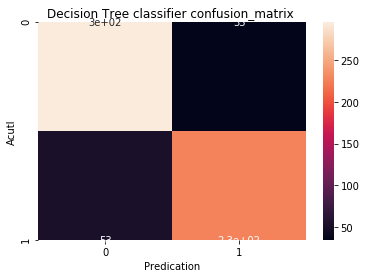

In [136]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [137]:
### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       330
           1       0.87      0.81      0.84       280

    accuracy                           0.86       610
   macro avg       0.86      0.85      0.85       610
weighted avg       0.86      0.86      0.86       610

accuracy_score= 0.8557377049180328


## Feature Selection by Percentile BY 70%

In [138]:
#print('Original X Shape is ' , X.shape)
FeatureSelection = SelectPercentile(score_func = f_classif, percentile=70) # score_func can = f_classif
X = FeatureSelection.fit_transform(x, y)


In [139]:
#showing X Dimension 
#print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())

x.columns[FeatureSelection.get_support()]



Selected Features are :  [False  True  True  True False  True  True False  True  True False  True
  True  True  True  True  True  True  True False False False]


Index(['Age', 'Adress', 'FBS', 'Creatinin', 'ALB', 'GPT', 'GOT', 'CA15', 'CEA',
       'WBC', 'RBC', 'HGB', 'PLT', 'ESR', 'LDH'],
      dtype='object')

In [140]:
X=BC.drop(["CLASS","Sex","Urea","TCa","ALP","K","Na","CL"],axis=1)
Y=BC["CLASS"] 
X.shape





(2437, 15)

In [141]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)


In [142]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [143]:
y_pred=D_classifier.predict_proba(x_test)[:,1]



new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)



In [144]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.8770491803278688

In [145]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.12295081967213115
mean_squared_error is = 0.35064343665913833


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8770491803278688
[[311  34]
 [ 41 224]]


Text(33.0, 0.5, 'Acutl')

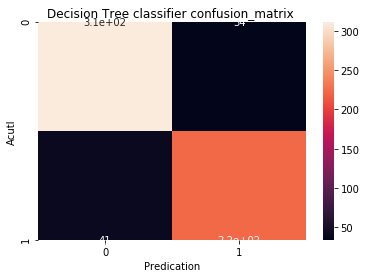

In [146]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")



In [147]:
### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 



classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       345
           1       0.87      0.85      0.86       265

    accuracy                           0.88       610
   macro avg       0.88      0.87      0.87       610
weighted avg       0.88      0.88      0.88       610

accuracy_score= 0.8770491803278688


## Feature Selection by Percentile BY 75%

In [148]:
#print('Original X Shape is ' , X.shape)
FeatureSelection = SelectPercentile(score_func = f_classif, percentile=75) # score_func can = f_classif
X = FeatureSelection.fit_transform(x, y)


In [149]:
#showing X Dimension 
#print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())

x.columns[FeatureSelection.get_support()]


Selected Features are :  [False  True  True  True  True  True  True False  True  True False  True
  True  True  True  True  True  True  True False False False]


Index(['Age', 'Adress', 'FBS', 'Urea', 'Creatinin', 'ALB', 'GPT', 'GOT',
       'CA15', 'CEA', 'WBC', 'RBC', 'HGB', 'PLT', 'ESR', 'LDH'],
      dtype='object')

In [150]:
X=BC.drop(["CLASS","Sex","TCa","ALP","K","Na","CL"],axis=1)
Y=BC["CLASS"] 
X.shape



(2437, 16)

In [151]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)


In [152]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [153]:
y_pred=D_classifier.predict_proba(x_test)[:,1]



new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [154]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.8508196721311475

In [155]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.14918032786885246
mean_squared_error is = 0.38623869286861


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8508196721311475
[[285  41]
 [ 50 234]]


Text(33.0, 0.5, 'Acutl')

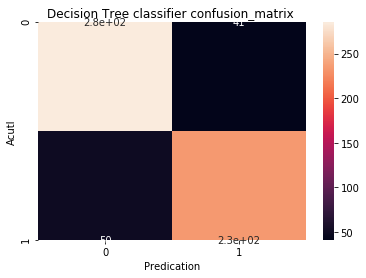

In [156]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [157]:
### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 



classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       326
           1       0.85      0.82      0.84       284

    accuracy                           0.85       610
   macro avg       0.85      0.85      0.85       610
weighted avg       0.85      0.85      0.85       610

accuracy_score= 0.8508196721311475


## Feature Selection by Percentile BY 80%

In [158]:
#print('Original X Shape is ' , X.shape)
FeatureSelection = SelectPercentile(score_func = f_classif, percentile=80) # score_func can = f_classif
X = FeatureSelection.fit_transform(x, y)



In [159]:
#showing X Dimension 
#print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())

x.columns[FeatureSelection.get_support()]


Selected Features are :  [False  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True False False False]


Index(['Age', 'Adress', 'FBS', 'Urea', 'Creatinin', 'ALB', 'GPT', 'GOT', 'ALP',
       'CA15', 'CEA', 'WBC', 'RBC', 'HGB', 'PLT', 'ESR', 'LDH'],
      dtype='object')

In [160]:
X=BC.drop(["CLASS","Sex","TCa","K","Na","CL"],axis=1)
Y=BC["CLASS"] 
X.shape


(2437, 17)

In [161]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)


In [162]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [163]:
y_pred=D_classifier.predict_proba(x_test)[:,1]



new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [164]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.8754098360655738

In [165]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.12459016393442623
mean_squared_error is = 0.35297331901211204


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8754098360655738
[[301  44]
 [ 32 233]]


Text(33.0, 0.5, 'Acutl')

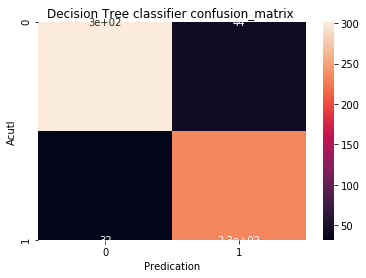

In [166]:

from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [167]:
### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 



classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       345
           1       0.84      0.88      0.86       265

    accuracy                           0.88       610
   macro avg       0.87      0.88      0.87       610
weighted avg       0.88      0.88      0.88       610

accuracy_score= 0.8754098360655738


## Feature Selection by Percentile BY 85%

In [168]:
#print('Original X Shape is ' , X.shape)
FeatureSelection = SelectPercentile(score_func = f_classif, percentile=85) # score_func can = f_classif
X = FeatureSelection.fit_transform(x, y)



In [169]:
#showing X Dimension 
#print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())

x.columns[FeatureSelection.get_support()]



Selected Features are :  [False  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True False False]


Index(['Age', 'Adress', 'FBS', 'Urea', 'Creatinin', 'ALB', 'GPT', 'GOT', 'ALP',
       'CA15', 'CEA', 'WBC', 'RBC', 'HGB', 'PLT', 'ESR', 'LDH', 'Na'],
      dtype='object')

In [171]:
X=BC.drop(["CLASS","Sex","TCa","K","CL"],axis=1)
Y=BC["CLASS"] 
X.shape



(2437, 18)

In [172]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)



In [173]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [174]:
y_pred=D_classifier.predict_proba(x_test)[:,1]



new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [175]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.8803278688524591

In [176]:


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.11967213114754098
mean_squared_error is = 0.3459365998959072


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8803278688524591
[[289  33]
 [ 40 248]]


Text(33.0, 0.5, 'Acutl')

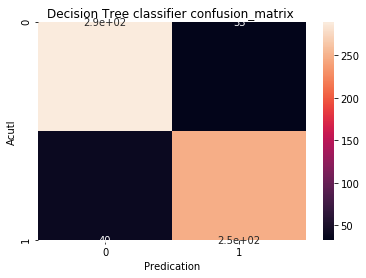

In [177]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")



In [178]:


### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 



classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       322
           1       0.88      0.86      0.87       288

    accuracy                           0.88       610
   macro avg       0.88      0.88      0.88       610
weighted avg       0.88      0.88      0.88       610

accuracy_score= 0.8803278688524591


## Feature Selection by Percentile BY 90%

In [179]:
#print('Original X Shape is ' , X.shape)
FeatureSelection = SelectPercentile(score_func = f_classif, percentile=90) # score_func can = f_classif
X = FeatureSelection.fit_transform(x, y)


In [180]:
#showing X Dimension 
#print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())

x.columns[FeatureSelection.get_support()]


Selected Features are :  [ True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True False False]


Index(['Sex', 'Age', 'Adress', 'FBS', 'Urea', 'Creatinin', 'ALB', 'GPT', 'GOT',
       'ALP', 'CA15', 'CEA', 'WBC', 'RBC', 'HGB', 'PLT', 'ESR', 'LDH', 'Na'],
      dtype='object')

In [182]:
X=BC.drop(["CLASS","TCa","K","CL"],axis=1)
Y=BC["CLASS"] 
X.shape



(2437, 19)

In [183]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)



In [184]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [185]:
y_pred=D_classifier.predict_proba(x_test)[:,1]



new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)



In [186]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)




0.8868852459016393

In [187]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.11311475409836065
mean_squared_error is = 0.33632536939452046


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8868852459016393
[[328  31]
 [ 38 213]]


Text(33.0, 0.5, 'Acutl')

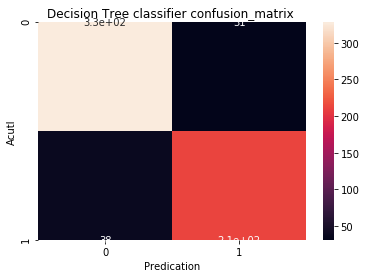

In [188]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")



In [189]:
### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       359
           1       0.87      0.85      0.86       251

    accuracy                           0.89       610
   macro avg       0.88      0.88      0.88       610
weighted avg       0.89      0.89      0.89       610

accuracy_score= 0.8868852459016393


## Feature Selection by Percentile BY 95%

In [190]:
#print('Original X Shape is ' , X.shape)
FeatureSelection = SelectPercentile(score_func = f_classif, percentile=95) # score_func can = f_classif
X = FeatureSelection.fit_transform(x, y)



In [191]:
#showing X Dimension 
#print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())

x.columns[FeatureSelection.get_support()]


Selected Features are :  [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False False]


Index(['Sex', 'Age', 'Adress', 'FBS', 'Urea', 'Creatinin', 'ALB', 'TCa', 'GPT',
       'GOT', 'ALP', 'CA15', 'CEA', 'WBC', 'RBC', 'HGB', 'PLT', 'ESR', 'LDH',
       'Na'],
      dtype='object')

In [192]:
X=BC.drop(["CLASS","K","CL"],axis=1)
Y=BC["CLASS"] 
X.shape



(2437, 20)

In [193]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)


In [194]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [195]:
y_pred=D_classifier.predict_proba(x_test)[:,1]



new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

In [196]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.8754098360655738

In [197]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.12459016393442623
mean_squared_error is = 0.35297331901211204


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8754098360655738
[[296  37]
 [ 39 238]]


Text(33.0, 0.5, 'Acutl')

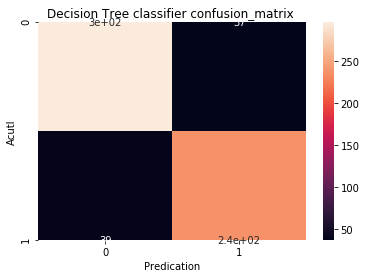

In [198]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [199]:
### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 



classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       333
           1       0.87      0.86      0.86       277

    accuracy                           0.88       610
   macro avg       0.87      0.87      0.87       610
weighted avg       0.88      0.88      0.88       610

accuracy_score= 0.8754098360655738


## Feature Selection by Percentile BY 100%

In [200]:
#print('Original X Shape is ' , X.shape)
FeatureSelection = SelectPercentile(score_func = f_classif, percentile=100) # score_func can = f_classif
X = FeatureSelection.fit_transform(x, y)




In [201]:
#showing X Dimension 
#print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())

x.columns[FeatureSelection.get_support()]


Selected Features are :  [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]


Index(['Sex', 'Age', 'Adress', 'FBS', 'Urea', 'Creatinin', 'ALB', 'TCa', 'GPT',
       'GOT', 'ALP', 'CA15', 'CEA', 'WBC', 'RBC', 'HGB', 'PLT', 'ESR', 'LDH',
       'Na', 'K', 'CL'],
      dtype='object')

In [202]:
X=BC.drop(["CLASS"],axis=1)
Y=BC["CLASS"] 
X.shape


(2437, 22)

In [203]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)



In [204]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [205]:
y_pred=D_classifier.predict_proba(x_test)[:,1]



new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [206]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.8557377049180328

In [207]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.14426229508196722
mean_squared_error is = 0.3798187661003169


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8557377049180328
[[298  57]
 [ 31 224]]


Text(33.0, 0.5, 'Acutl')

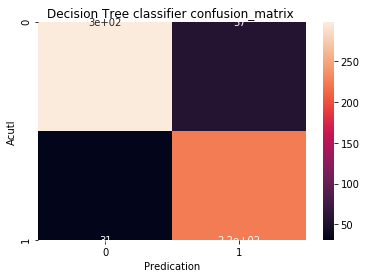

In [208]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [209]:
### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 



classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       355
           1       0.80      0.88      0.84       255

    accuracy                           0.86       610
   macro avg       0.85      0.86      0.85       610
weighted avg       0.86      0.86      0.86       610

accuracy_score= 0.8557377049180328


In [212]:
Percentile_best= ['10%',"15%","20%","25%","30%","35%","40%","45%","50%","55%","60%","65%","70%","75%","80%","85%","90%","95%","100%"]
validation_accuracy = [71,74,74,78,82,84,86,86,84,88,84,85,87,85,87,88,88,87,85]
                                   
List = zip(Percentile_best,validation_accuracy)
df = pd.DataFrame(data = List, columns=['Percentile_best','validation_accuracy'],)
df

,Percentile_best,validation_accuracy
0,10%,71
1,15%,74
2,20%,74
3,25%,78
4,30%,82
5,35%,84
6,40%,86
7,45%,86
8,50%,84
9,55%,88


C:\Users\TOSHIBA\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'bst'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


the best Percentile of fs by SelectPercentile %80 :
Age, FBS, Creatinin, ALB, CA15, CEA, WBC, RBC, HGB, PLT, ESR, LDH


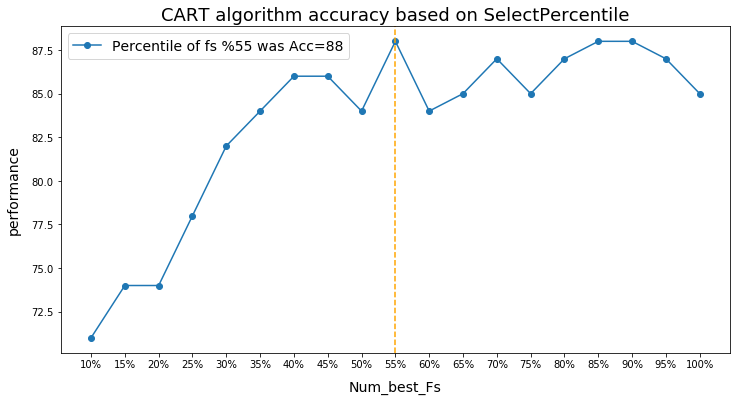

In [215]:
plt.figure(figsize=(12,6))
plt.plot(df['Percentile_best'],df['validation_accuracy'],label='Percentile of fs %55 was Acc=88',marker='o')

plt.title("CART algorithm accuracy based on SelectPercentile",fontsize=18)
plt.axvline(x=9, color='orange', linestyle='--')
plt.xlabel('Num_best_Fs',labelpad=10, fontsize=14)
plt.ylabel('performance',labelpad=10, fontsize=14)
plt.legend(loc='bst',fontsize=14)

print("the best Percentile of fs by SelectPercentile %80 :")

print("Age, FBS, Creatinin, ALB, CA15, CEA, WBC, RBC, HGB, PLT, ESR, LDH")
plt.show()